### **Easy**
Image Classification with MobileNet

In [6]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image

import matplotlib.pyplot as plt

1/1 [==============================] - 1s 655ms/step


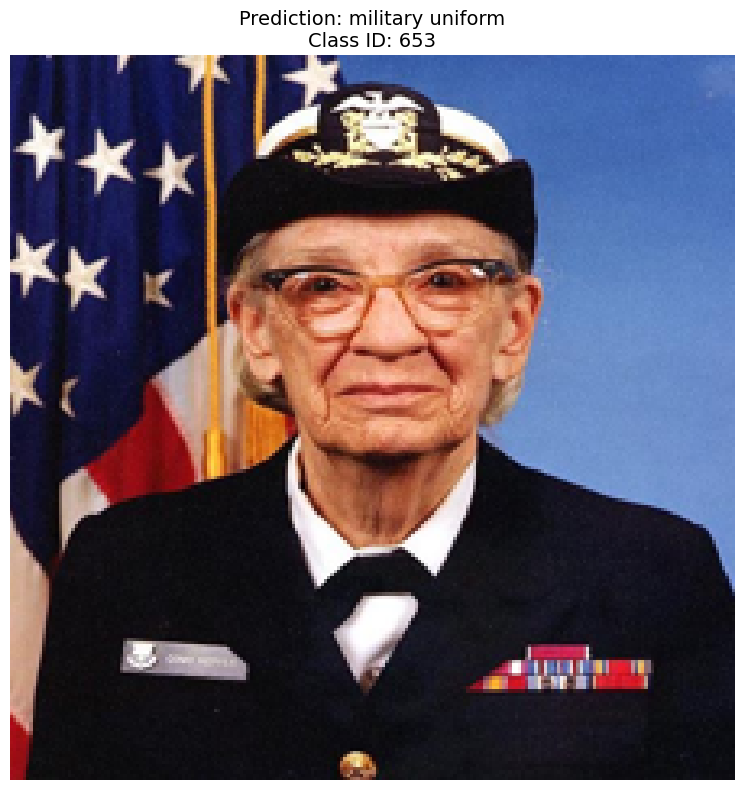

Prediction: military uniform
Confidence: 9.4658


In [6]:
# Load a pre-trained MobileNet model
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=(224, 224, 3))
])

# Load and preprocess an image
image_path = tf.keras.utils.get_file('grace_hopper.jpg',
                                     'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
img = Image.open(image_path).resize((224, 224))
img_array = np.array(img) / 255.0
img_array = img_array[np.newaxis, ...]

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Get class labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt',
                                      'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
with open(labels_path) as f:
    labels = f.readlines()

# Clean up label text
predicted_label = labels[predicted_class].strip()

# Display the image and prediction
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label}\nClass ID: {predicted_class}", fontsize=14)
plt.tight_layout()
plt.show()

print(f"Prediction: {predicted_label}")
print(f"Confidence: {predictions[0][predicted_class]:.4f}")

### **Intermediate**
Transfer Learning for Custom Image Classification

In [9]:
import pathlib

Dataset downloaded and extracted to: /root/.keras/datasets/flower_photos
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Epoch 1/5
92/92 [==============================] - 141s 1s/step - loss: 0.5740 - accuracy: 0.7950 - val_loss: 0.3246 - val_accuracy: 0.8869
Epoch 2/5
92/92 [==============================] - 148s 2s/step - loss: 0.2857 - accuracy: 0.8971 - val_loss: 0.3153 - val_accuracy: 0.8924
Epoch 3/5
92/92 [==============================] - 153s 2s/step - loss: 0.1909 - accuracy: 0.9373 - val_loss: 0.2982 - val_accuracy: 0.9005
Epoch 4/5
92/92 [==============================] - 142s 2s/step - loss: 0.1543 - accuracy: 0.9489 - val_loss: 0.2808 - val_accuracy: 0.9128
Epoch 5/5
92/92 [==============================] - 142s 2s/step - loss: 0.1014 - accuracy: 0.9707 - val_loss: 0.3038 - val_accuracy: 0.9074


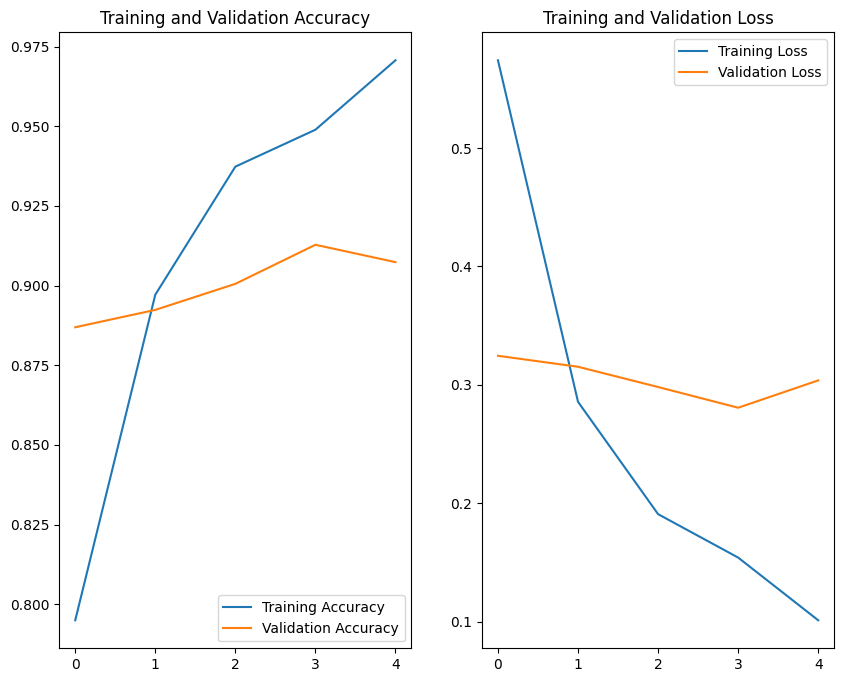

In [14]:
# Download and extract the flowers dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

print(f"Dataset downloaded and extracted to: {data_dir}")

# Now use the local path instead of the URL
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Save class_names before mapping
class_names = train_ds.class_names

# Data preprocessing
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Build model with transfer learning
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(img_height, img_width, 3),
    trainable=False)

num_classes = len(class_names)

model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### **Advanced**
neural style transfer

In [ ]:
!pip install tensorflow tensorflow-hub

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import requests
from io import BytesIO

# Function to load and preprocess an image from a URL.
def load_image(image_url, max_dim=512):
    # Adding headers to mimic a browser request, which sometimes helps with image loading
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(image_url, headers=headers, stream=True)
    response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)
    img = PIL.Image.open(response.raw).convert('RGB')

    # Resize the image so that its largest dimension is max_dim.
    # Use PIL.Image.Resampling.LANCZOS instead of the deprecated PIL.Image.ANTIALIAS
    img.thumbnail((max_dim, max_dim), PIL.Image.Resampling.LANCZOS)
    img = np.array(img).astype(np.float32)[np.newaxis, ...] / 255.0
    return img

# URLs for a sample content image and a sample style image.
# You can replace these with any image URLs you prefer.
content_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'  # Updated URL
style_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'  # Updated URL

# Load the images.
content_image = load_image(content_url)
style_image = load_image(style_url)

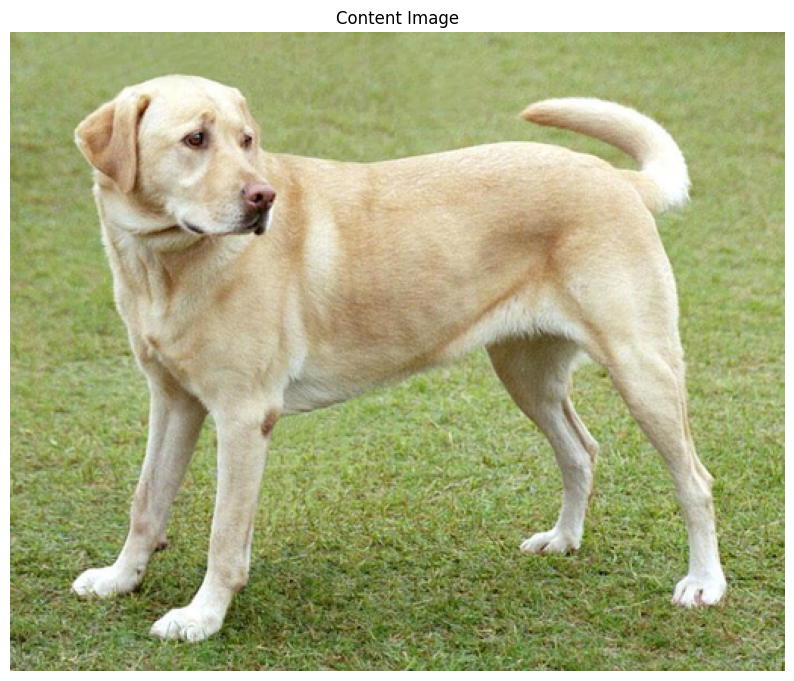

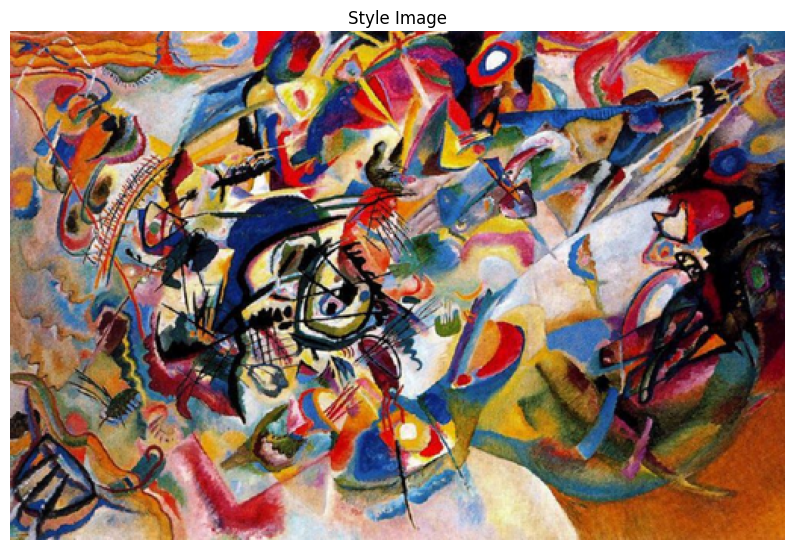

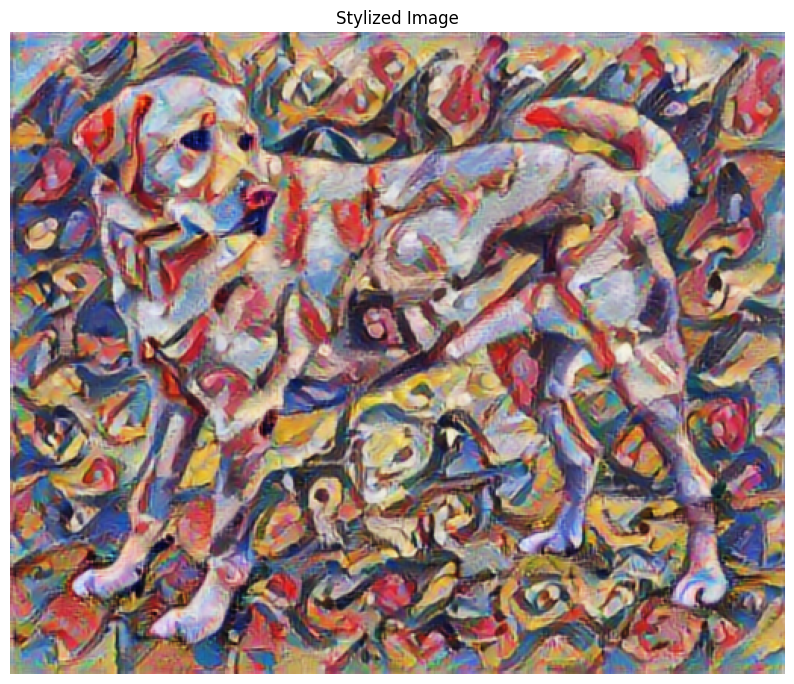

In [2]:


# Load the pre-trained arbitrary image stylization module from TensorFlow Hub.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply the style transfer.
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

# Function to display images.
def show_image(image, title=''):
    plt.figure(figsize=(10, 10))
    plt.imshow(np.squeeze(image))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the images.
show_image(content_image, 'Content Image')
show_image(style_image, 'Style Image')
show_image(stylized_image, 'Stylized Image')

### **Expert**
 Style Transfer with Arbitrary Image Stylization

195196/195196 [==============================] - 0s 0us/step
Style transfer took 3.67 seconds


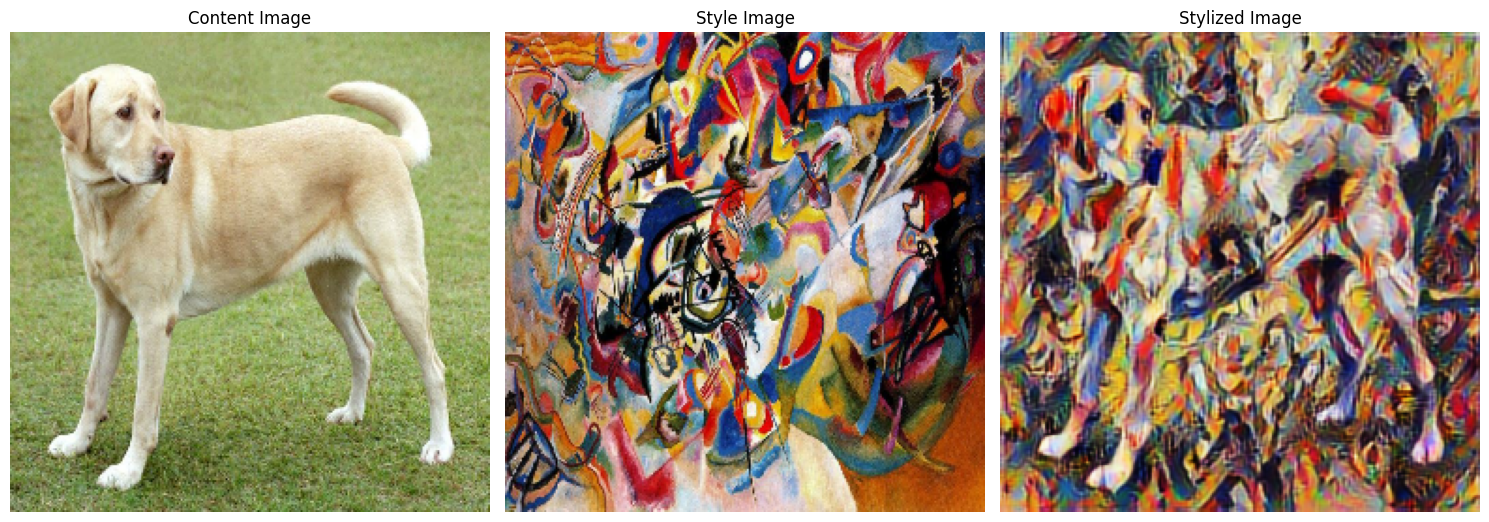

1391462/1391462 [==============================] - 0s 0us/step
Style transfer took 1.46 seconds


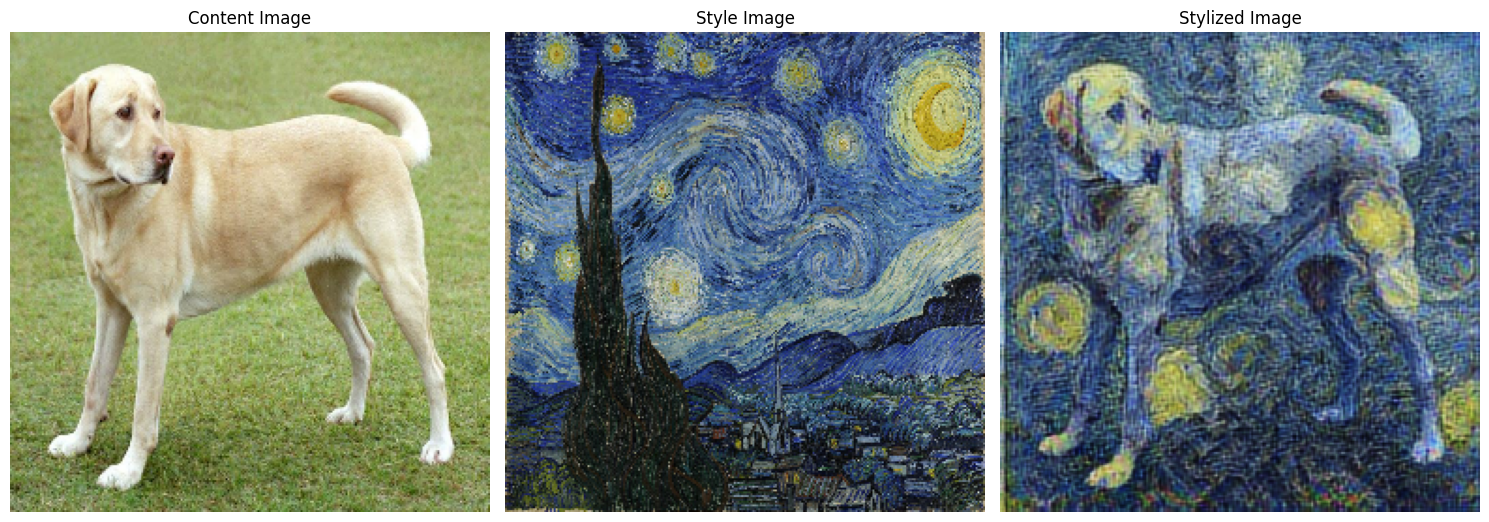

In [12]:
import time

# Load the style transfer model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Function to load and preprocess images
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [256, 256])
    return img

# Function to perform style transfer and visualize results
def style_transfer(content_path, style_path):
    content_image = load_image(content_path)
    style_image = load_image(style_path)

    # Expand dimensions for model input
    content_image = content_image[tf.newaxis, ...]
    style_image = style_image[tf.newaxis, ...]

    # Measure performance
    start_time = time.time()

    # Generate stylized image
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    end_time = time.time()
    print(f"Style transfer took {end_time - start_time:.2f} seconds")

    # Visualize results
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(content_image[0])
    plt.title('Content Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(style_image[0])
    plt.title('Style Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(stylized_image[0])
    plt.title('Stylized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return stylized_image[0]

# Download sample images
content_image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg',
                                             'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_image_path = tf.keras.utils.get_file('kandinsky.jpg',
                                          'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Perform style transfer
stylized_image = style_transfer(content_image_path, style_image_path)

# Try with multiple style images
style_image_path2 = tf.keras.utils.get_file('starry_night.jpg',
                                           'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1920px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

stylized_image2 = style_transfer(content_image_path, style_image_path2)
